PROBLEM 1: Aminer : basic dataset analysis

In [1]:
pip install wget 

  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=8f148265b0edf0ba917d6a7f367e404015ad52236bef0cb883d510927aff6f03
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import wget
import pandas as pd
import numpy as np
import collections
import matplotlib.pyplot as plt

In [3]:
url = 'https://lfs.aminer.cn/lab-datasets/citation/acm.v9.zip'
wget.download(url)
!unzip acm.v9.zip

Archive:  acm.v9.zip
  inflating: acm.txt                 


A) Compute the number of distinct authors, publication venues, publications, and citations/references

In [4]:
authors = []
venues = []
publications = []
references = []

with open("acm.txt", 'r+', newline = '') as f:
    for each in f:        
        if each.startswith("#@"):
          for i in each[3:].split(';'):
            authors.append(i.strip())
        elif each.startswith("#c"):
          venues.append(each)
        elif each.startswith("#index"):
          temp = each[7:]
          publications.append(each)
        elif each.startswith("#%"):
          references.append(each + temp)

authors = list(set(authors))
venues = list(set(venues))
pubs = list(set(publications))
refs = list(set(references))

key = ['Authors', 'Venues', 'Publications', 'References']
value = [len(authors), len(venues), len(publications), len(references)]
distinct = pd.DataFrame({'Type':key, 'Count':value})
distinct

,Type,Count
0,Authors,1662167
1,Venues,273329
2,Publications,2385066
3,References,9671893


B) Are these numbers likely to be accurate? As an example look up all the publications venue names associated with the conference “Principles and Practice of Knowledge Discovery in Databases”13 – what do you notice?

In [ ]:
venue = []

with open("acm.txt", 'r+', newline = '') as f:
  for text in f:
    if text.startswith("#c"):
      if "Principles and Practice of Knowledge Discovery in Databases" in each:
        venue.append(text[2:])
print("Associated Venue Names:")
for v in list(set(venue)):
  print(v)

Publication venue names associated with the given conference are:
PKDD 2007 Proceedings of the 11th European conference on Principles and Practice of Knowledge Discovery in Databases

PKDD '04 Proceedings of the 8th European Conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2005: 9th European Conference on Principles and Practice of Knowledge Discovery in Databases, Porto, Portugal, October ... / Lecture Notes in Artificial Intelligence)

PKDD'05 Proceedings of the 9th European conference on Principles and Practice of Knowledge Discovery in Databases

Knowledge Discovery in Databases: PKDD 2006: 10th European Conference on Principles and Practice of Knowledge Discovery in Databases, Berlin, Germany, September ... (Lecture Notes in Computer Science)



The count values is not accurate as they are not consistent throughout the text dataset. There are different venue names for the same conference which will result in wrong manipulation.  

C) For each author, construct the list of publications. Plot a histogram of the number of publications per author (use a logarithmic scale on the y axis)

In [ ]:
pub_authors = {}
with open("acm.txt", 'r+', newline = '') as f:
   for text in f:
     if text.startswith("#@"):
       for i in text[2:].split(';'):
         if pub_authors.get(i.strip()) == None:
           pub_authors[i.strip()] = 1
         else:
           pub_authors[i.strip()] += 1

publications = list(pub_authors.values())
authors = list(pub_authors.keys())
del publications[authors.index("")]
del authors[authors.index("")]
plt.hist(pubs, bins = 30, log = True)
plt.xlabel('Authors')
plt.ylabel('Number of publications')
plt.title('Authors Vs Publications')
plt.show()

D) Calculate the mean and standard deviation of the number of publications per author. Also calculate the Q1 (1st quartile14), Q2 (2nd quartile, or median) and Q3 (3rd quartile) values. Compare the median to the mean and explain the difference between the two values based on the standard deviation and the 1st and 3rd quartiles.

In [ ]:
mean_pub = np.mean(publications)
std_pub = np.std(publications)
q1 = np.percentile(publications, 25)
median_pub = np.percentile(publications, 50)
q3 = np.percentile(publications, 75)
measure = ['Mean', 'Std', 'Q1', 'Q2/Median', 'Q3']
count = [mean_pub, std_pub, q1, median_pub, q3]
qty = pd.DataFrame({'Measure':measure, 'Count':count})
qty

,Type,Count
0,Mean,1.343925
1,Std,2.590153
2,Q1,1.000000
3,Median,1.000000
4,Q3,1.000000


The number of publications associated with an author is mostly 1. The values found above show the same. The median or Q2 is 1 while mean is 1.34 with std 2.59 this shows the median, Q1 and Q2 lies in the range of std from mean

E) Now plot a histogram of the number of publications per venue, as well as calculate the mean, standard deviation, median, Q1, and Q3 values. What is the venue with the largest number of publications in the dataset?

In [ ]:
pub_venues = {}
with open("acm.txt", 'r+', newline = '') as f:
   for text in f:
     if text.startswith("#c"): 
       if pub_venues.get(text[2:]) == None:
         pub_venues[text[2:]] = 1
       else:
         pub_venues[text[2:]] += 1

pubication_ven = list(pub_venues.values())
venues = list(pub_venues.keys())
plt.hist(pubication_ven, bins = 30, log = True)
plt.xlabel('Venues')
plt.ylabel('Number of publications')
plt.title('Venues Vs Publications')
plt.show()

In [ ]:
mean = np.mean(pubication_ven)
std = np.std(pubication_ven)
q1 = np.percentile(pubication_ven, 25)
median = np.percentile(pubication_ven, 50)
q3 = np.percentile(pubication_ven, 75)
measures = ['Mean', 'Std', 'Q1', 'Q2/Median', 'Q3']
count = [mean, std, q1, median, q3]
qty = pd.DataFrame({'Type':measures, 'Count':count})
qty

In [ ]:
print("Venue with largest no. of publications:",venues[list(pubication_ven.values()).index(max(pubication_ven.values()))])

F) Plot a histogram of the number of references (number of publications a publication refers to) and citations (number of publications referring to a publication) per publication. What is the publication with the largest number of references? What is the publication with the largest number of citations? Do these make sense?

In [ ]:
publs = {}
cits = {}
cv_cnt = {}
refs = {}

with open('acm.txt', 'r', newline = '') as f:
  for each in f: 
    t = 0
    for each in f:
      if each.startswith("#index"):
        t = int(each[6:])
      elif each.startswith("#c"):
        temp = each[2:]
        if publs.get(t) == None:
          publs[t] = temp
      elif each.startswith("#%"):
        if refs.get(t) == None:
          refs[t] = 1
        else:
          refs[t] += 1

        if cits.get(int(each[2:])) == None:
          cits[int(each[2:])] = 1
        else: 
          cits[int(each[2:])] += 1
        
        cv = publs.get(int(each[2:]))
        if cv_cnt.get(cv) == None:
          cv_cnt[cv] = 1
        else:
          cv_cnt[cv] += 1

In [ ]:
refs_keys = list(refs.keys())
cits_keys = list(cits.keys())
refs_values = list(refs.values())
cits_values = list(cits.values())
max_ref = max(list(refs.values()))
max_cit = max(list(cits.values())) 
print("Maximum References:{0}, Publication Index:{1}".format(max_ref, refs_keys[refs_values.index(max_ref)]))
print("Maximum Citations:{0}, Publication Index:{1}".format(max_cit, cits_keys[cits_values.index(max_cit)]))

Maximum References:809, Publication Index:2015217
Maximum Citations:938039, Publication Index:2135000


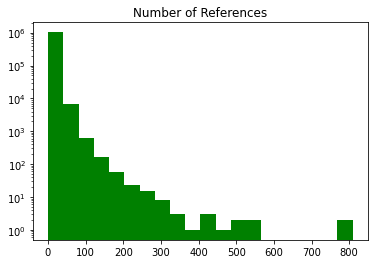

In [ ]:
plt.title('Number of References')
plt.hist(list(refs.values()), bins = 20, log=True, color = 'green')
plt.show()

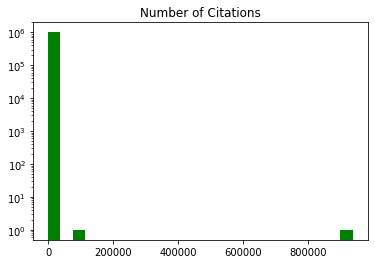

In [ ]:
plt.title('Number of Citations')
plt.hist(list(cits.values()), bins = 25, log = True, color = 'green')
plt.show()

F. The number of citations and references associated with a publication should almost be equal which is the case here.

G) Calculate the so called “impact” factor for each venue. To do so, calculate the total number of citations for the publications in the venue, and then divide this number by the number of publications for the venue. Plot a histogram of the results

In [ ]:
impact_factor = {}
for v in cv_cnt.keys():
  impact_factor[v] = 0
  if v != 'None' and pubication_ven.get(v) != None:
    impact_factor[v] = cv_cnt[v]/pubication_ven[v]

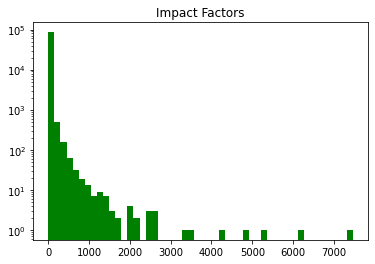

In [ ]:
plt.title('Impact Factors')
plt.hist(list(impact_factor.values()), bins = 50, log = True, color = 'green')
plt.show()

H) What is the venue with the highest apparent impact factor? Do you believe this number?(http://mdanderson.libanswers.com/faq/26159)

In [ ]:
highest_val = max(list(impact_factor.values()))
highest_index = list(impact_factor.values()).index(highest_val)
highest_venue = list(impact_factor.keys())[highest_index]
print("The venue with the highest apparent impact factor is {0}".format(highest_venue))

The venue with the highest apparent impact factor is Challenge of Microprocessors



H. We calculated the impact factor from the number of citations of a particular venue and the number of publications associated with the venue. From our data analysis, we found that the names of the venues might be different across the dataset making it ambiguous. Thus, the obtained impact factor values might not be accurate.

I) Now repeat the calculation from item b., but restrict the calculation to venues with at least 10 publications. How does your histogram change? List the citation counts for all publications from the venue with the highest impact factor. How does the impact factor (mean number of citations) compare to the median number of citations?

In [ ]:
impact_factor_10 = {}
for v in cv_cnt.keys():
  impact_factor_10[v] = 0
  if v != 'None' and pubication_ven.get(v) != None and pubication_ven[v] > 10:
    impact_factor_10[v] = cv_cnt[v]/pubication_ven[v]

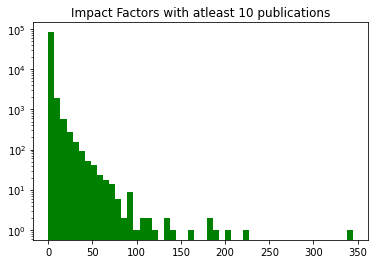

In [ ]:
plt.title('Impact Factors with atleast 10 publications')
plt.hist(list(impact_factor_10.values()), bins = 50, log = True, color = 'green')
plt.show()

J) Finally, construct a list of publications for each publication year. Use this list to plot the average number of references and average number of citations per publication as a function of time. Explain the differences you see in the trends.

In [ ]:
years_pub = {}
times = {}

with open("acm.txt", "r", newline = '') as f:
  val = 0
  time = 0
  for text in f:
    if text.startswith("#index"):
      val = int(each[6:])
    elif text.startswith("#t"):
      time = int(text[2:])
      if years_pub.get(time) == None:
        years_pub[time] = {"cits":0, "refs":0, "pubs":0}
        years_pub[time]["pubs"] = 1
        if refs.get(val) != None:
          references = refs.get(t)
          years_pub[time]["refs"] = references
        if cits.get(val) != None:
          citations = cits.get(t)
          years_pub[time]["cits"] = citations
      else:
        years_pub[time]["pubs"] += 1
        if cits.get(val) != None:
          citations = cits.get(t)
          years_pub[time]["cits"] += citations
        if refs.get(val) != None:
          references = refs.get(t)
          years_pub[time]["refs"] += references

for time in years_pub.keys():
  times[time] = {}
  times[time]["cits"] = years_pub[time]["cits"]/years_pub[time]["pubs"]
  times[time]["refs"] = years_pub[time]["refs"]/years_pub[time]["pubs"]

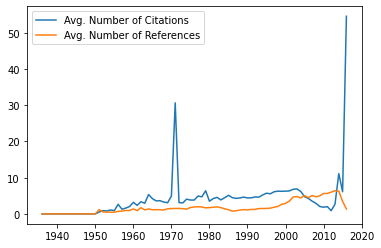

In [ ]:
avg_time = collections.OrderedDict(sorted(times.items()))

item1_list = list(avg_time.keys())
item2_list = list([avg_time[c]["cits"] for c in item1_list])
item3_list = list([avg_time[r]["refs"] for r in item1_list])
fig, axes = plt.subplots()
plt.plot(item1_list, item2_list, label = "Avg. Number of Citations")
plt.plot(item1_list, item3_list, label = "Avg. Number of References")
axes.legend(loc = "upper left")
plt.show()